In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataframe = pd.read_csv("D:\Zomato.csv")
print(dataframe.head())
print(dataframe.tail())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
                 name online_order book_table   rate  votes  \
143  Melting Melodies           No         No  3.3/5      0   
144   New Indraprasta           No         No  3.3/5      0   
145      Anna Kuteera          Yes         No  4.0/5    771   
146            Darbar           No         No  3.0/5     

<>:5: SyntaxWarning: invalid escape sequence '\Z'
<>:5: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\aishw\AppData\Local\Temp\ipykernel_13812\3732552388.py:5: SyntaxWarning: invalid escape sequence '\Z'
  dataframe = pd.read_csv("D:\Zomato.csv")


In [10]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [12]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


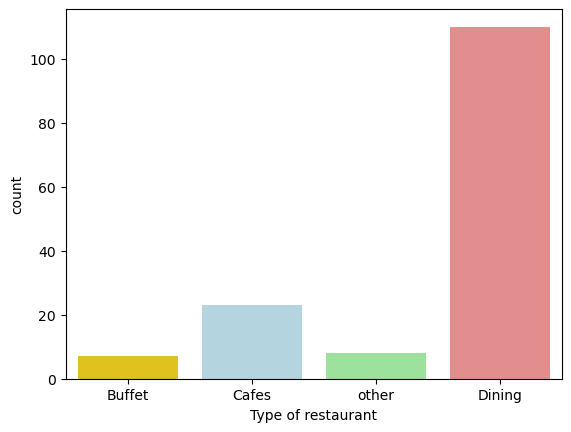

In [50]:
sns.countplot(x=dataframe['listed_in(type)'],hue=dataframe['listed_in(type)'], palette=['gold', 'lightblue', 'lightgreen', 'lightcoral'])
plt.xlabel("Type of restaurant")
plt.show()

Text(0, 0.5, 'Votes')

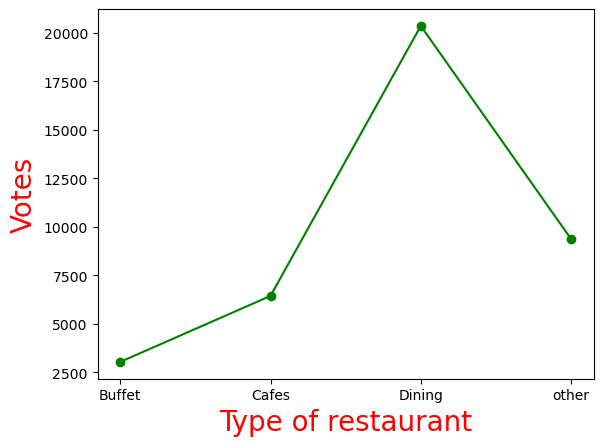

In [22]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)


In [24]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

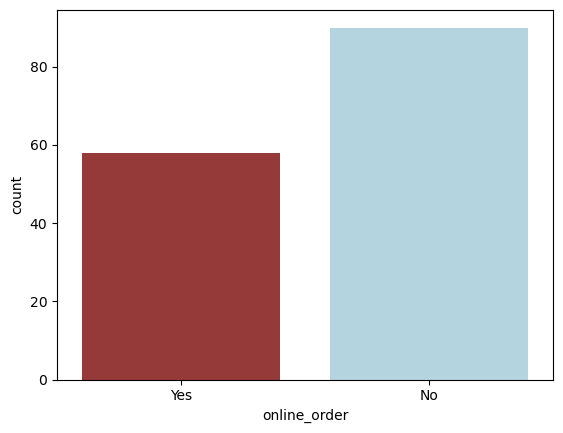

In [56]:
sns.countplot(x=dataframe['online_order'],hue=dataframe['online_order'], palette=['brown', 'lightblue'])


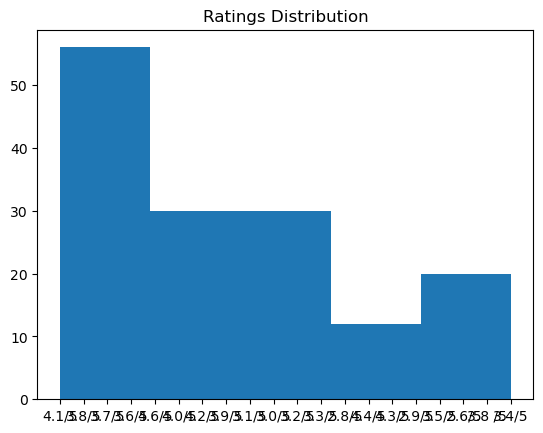

In [38]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

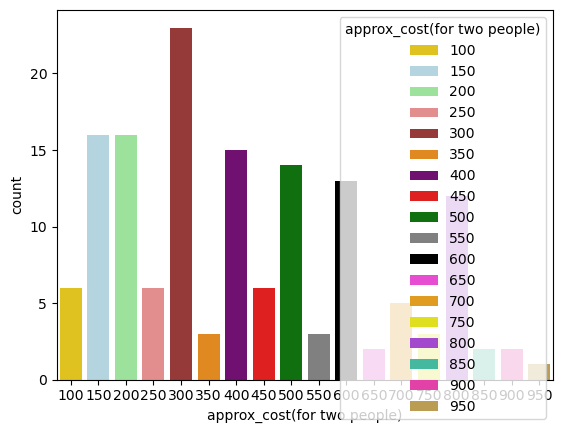

In [98]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, hue=couple_data, palette=['gold', 'lightblue', 'lightgreen', 'lightcoral', 'brown', 'darkorange', 'purple', 'red', 'green', 'grey', 'black', '#FF34E3','orange','yellow','#AB33E4','#32CCAB','#FD26AF','#CBA541'])


C:\Users\aishw\AppData\Local\Temp\ipykernel_13812\3130391724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = dataframe, palette=['brown', 'lightblue'])


<Axes: xlabel='online_order', ylabel='rate'>

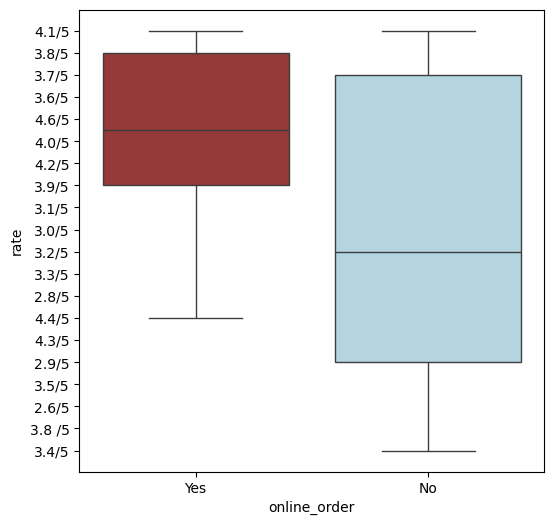

In [102]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe, palette=['brown', 'lightblue'])


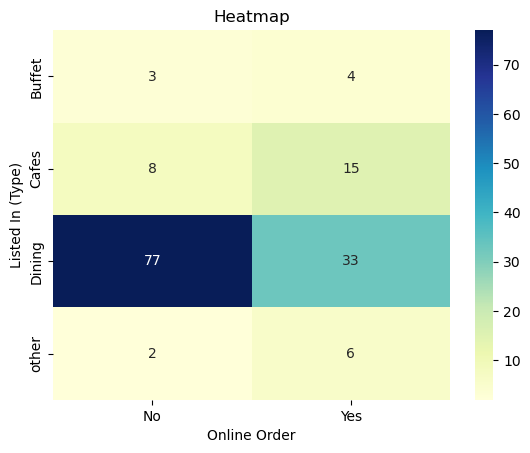

In [104]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


In [106]:
print(dataframe.describe())

             votes  approx_cost(for two people)
count   148.000000                   148.000000
mean    264.810811                   418.243243
std     653.676951                   223.085098
min       0.000000                   100.000000
25%       6.750000                   200.000000
50%      43.500000                   400.000000
75%     221.750000                   600.000000
max    4884.000000                   950.000000


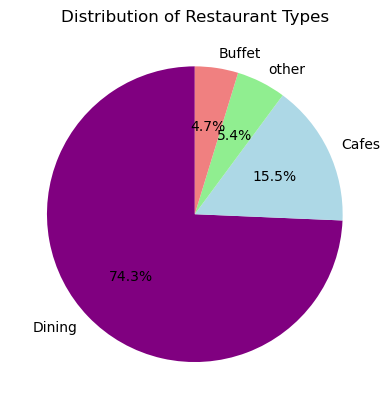

In [110]:


# Split the 'listed_in(type)' column by commas, and flatten the list
all_types = dataframe['listed_in(type)'].str.split(',').explode()

# Strip any leading/trailing spaces from the values (optional)
all_types = all_types.str.strip()

# Calculate the count of each category
category_counts = all_types.value_counts()

# Create Pie Chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['purple', 'lightblue', 'lightgreen', 'lightcoral', 'pink', 'cyan'])

# Add Title
plt.title('Distribution of Restaurant Types')

# Display the pie chart
plt.show()
